# Data Wrangling Project - Twitter Account WeRateDogs

In this project I will wrangle and analyze the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. WeRateDogs asks people to send photos of their dogs which are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10".

## Gather

Gather 3 pieces of data:
* The WeRateDogs Twitter archive: twitter_archive_enhanced.csv
* The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
* Queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [2]:
#import libraries
import pandas as pd
import requests
import tweepy
import json
import re
from datetime import datetime
import time
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the twitter archive file
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#import the tweet image predictions using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#read the image predictions file
images = pd.read_csv('image-predictions.tsv', sep = '\t')

In [20]:
#access Twitter API
consumer_key = 'nUEeHOOUee42DaNHa7l3EX1wv'
consumer_secret = 'Y232RMHyf1YCsjPLZV0LmdHrD0942AjyPHcIibYUwrtzBORkFs'
access_token = '988144052439838722-qv8g4xTxhB1LcytyAk94oUukgcPjmJ3'
access_secret = 'iXC8lzHUHjj5mx2EDIRHnFYEPlsLbzpjozbzASS73RpBc'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [21]:
#add tweets to tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 687
Rate limit reached. Sleeping for: 690


In [5]:
#append the tweets to a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [6]:
#create the json_tweets data frame
json_tweets = pd.DataFrame()

In [7]:
#add the necessary columns to the data frame
json_tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
json_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
json_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess

After gathering each of the above pieces of data, I assessed them visually and programmatically for quality and tidiness issues. 

In [8]:
#display the the twitter archive
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#display the images predictions data frame
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
#display the json tweets data frame
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,8630,38944
1,892177421306343426,6339,33340
2,891815181378084864,4209,25117
3,891689557279858688,8755,42282
4,891327558926688256,9512,40448
5,891087950875897856,3150,20286
6,890971913173991426,2099,11896
7,890729181411237888,19136,65788
8,890609185150312448,4317,27861
9,890240255349198849,7513,32045


In [11]:
#display info of twitter archive
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#display statistics for twitter archive
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#display info for images predictions
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#display statistics for images predictions
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
#display info for json tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 3 columns):
id                4690 non-null int64
retweet_count     4690 non-null int64
favorite_count    4690 non-null int64
dtypes: int64(3)
memory usage: 110.0 KB


In [16]:
#display statistics for json_tweets
json_tweets.describe()

,id,retweet_count,favorite_count
count,4.690000e+03,4690.000000,4690.000000
mean,7.422940e+17,3038.579531,8092.085075
std,6.832913e+16,5052.161841,12172.021146
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,608.000000,1407.500000
50%,7.189392e+17,1421.500000,3548.500000
75%,7.986979e+17,3540.750000,10005.000000
max,8.924206e+17,77659.000000,143872.000000


In [17]:
#check the number of sources in twitter archive
twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
#check if there are any duplicate tweet ids in twitter archive
sum(twitter.tweet_id.duplicated())

0

In [19]:
#check names in twitter archive
twitter.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
Buddy          7
an             7
Toby           7
Rusty          6
Stanley        6
Jax            6
Bella          6
Dave           6
Jack           6
Milo           6
Leo            6
Koda           6
Scout          6
Oscar          6
Sammy          5
            ... 
Crouton        1
Damon          1
Evy            1
Dug            1
Kara           1
light          1
Reagan         1
Ulysses        1
Mona           1
Skittles       1
Tupawc         1
Bodie          1
Koko           1
Blu            1
Alexander      1
Pupcasso       1
Walker         1
Holly          1
Carper         1
Dudley         1
Ebby           1
Sunshine       1
Karll          1
Malikai        1
Timmy          1
Sky            1
Bradlay        1
Covach        

In [20]:
#sort names
twitter.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [21]:
#check the number of images
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
#check if there are any duplicates tweet_ids in images dataframe
sum(images.tweet_id.duplicated())

0

In [23]:
#check duplicates ids in json tweets
sum(json_tweets.id.duplicated())

2345

#### Quality

`twitter` data frame

* Text lines contain links
* timestamp column is a string
* Missing dog names (replaced with 'None')
* Incorrect dog names
* Rating denominator higher than 10
* Retweets present in the file: texts start with "RT @"
* "&amp" characters present in text 

`images` data frame
* Some breed names have the first letter lowercase in p1, p2, p3 columns

#### Tidiness

* Irrelevant columns in `twitter` data frame: "in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"
* Column name timestamp to be renamed in `twitter` data frame
* Column name "expanded_url" not explicit enough in `twitter` data frame
* Dog stages split into 4 different columns in `twitter` dataframe
* "id" column name from `json_tweets` data frame not aligned with the rest of data frames
* 3 separate data frames


## Clean

Cleaned each of the issues I documented while assessing.

In [24]:
#create copies of the 3 data frames
twitter_clean = twitter.copy()
images_clean = images.copy()
json_clean = json_tweets.copy()

### Quality

`twitter`: **Text lines contain links**

***Define***

Remove the links contained in the text lines.

***Code***

In [25]:
#create a regex pattern in order to define the URLs that are present in the text column
pattern = r"http\S+"

In [26]:
#write a for loop to remove all URLs from line texts
clean_text = []

for line in twitter_clean['text']:
    clean_text.append(re.sub(pattern, "", line))
    
twitter_clean['text'] = clean_text

***Test***

In [27]:
#check the new variable text ans select a random row
twitter_clean['text'][1445]

'Oh my god 10/10 for every little hot dog pupper'

`twitter`: **timestamp column is a string**

***Define***

Convert timestamp column from string to date.

***Code***

In [28]:
#create a for loop to convert each string timestamp to a date
dates = []

for date in twitter_clean['timestamp']:
    dates.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S +0000").date())
    
    
twitter_clean['timestamp'] = dates

***Test***

In [29]:
#check column timestamp
twitter_clean['timestamp'].sample(4)

2131    2015-11-27
1578    2016-01-13
1361    2016-02-26
2215    2015-11-22
Name: timestamp, dtype: object

`twitter`: **Missing dog names (replaced with 'None')**

***Define***

Remove the lines that have the name of the dog "None".

***Code***

In [30]:
#count the number of lines that have the name of the dog "None"
sum(twitter_clean.name == "None")

745

In [31]:
#remove these lines
twitter_clean = twitter_clean[twitter_clean.name != "None"]

***Test***

In [32]:
#check if there are any "None" names left
sum(twitter_clean.name == "None")

0

`twitter`: **Incorrect dog names**

***Define***

Remove the lines that have incorrect dog names.

***Code***

In [33]:
#find the lower case names in twitter clean and confirm they are not real names
lower = []

for word in twitter_clean['name']:
    if word.islower():
         lower.append(word)
            
Counter(lower)

Counter({'a': 55,
         'actually': 2,
         'all': 1,
         'an': 7,
         'by': 1,
         'getting': 2,
         'his': 1,
         'incredibly': 1,
         'infuriating': 1,
         'just': 4,
         'life': 1,
         'light': 1,
         'mad': 2,
         'my': 1,
         'not': 2,
         'officially': 1,
         'old': 1,
         'one': 4,
         'quite': 4,
         'space': 1,
         'such': 1,
         'the': 8,
         'this': 1,
         'unacceptable': 1,
         'very': 5})

In [34]:
#create a df only with the first letter in names that is uppercase
twitter_clean = twitter_clean[twitter_clean.name.map(lambda word: word.istitle())]

***Test***

In [35]:
#check if there are any lowercase letter names left
lower2 = []

for word in twitter_clean['name']:
    if word.islower():
         lower2.append(word)
            
Counter(lower2)

Counter()

`twitter`: **Rating denominator higher than 10**

***Define***

Remove the lines that have a denominator higher than 10.

***Code***

In [36]:
#chech the value counts of the rating denominator
twitter_clean['rating_denominator'].value_counts()

10    1493
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [37]:
#see the lines
twitter_clean[twitter_clean.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [38]:
#create df with rating denominators lower than 10
twitter_clean = twitter_clean[twitter_clean.rating_denominator <=  10]

***Test***

In [39]:
#confirm changes
twitter_clean[twitter_clean.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`twitter`: **Retweets present in the file: texts start with "RT @"**

***Define***

Remove the text retweets starting with "RT @", as we are looking only for original tweets.

***Code***

In [40]:
#remote the text lines containing RT
twitter_clean = twitter_clean[~twitter_clean['text'].str.contains("RT @")]

***Test***

In [41]:
#check
twitter_clean[twitter_clean['text'].str.contains("RT @")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`twitter`: **"&amp" characters present in text**

***Define***

Remove the characters "&amp" from text.

***Code***

In [42]:
#remove lines containing &amp
twitter_clean = twitter_clean[~twitter_clean['text'].str.contains("&amp")]

***Test***

In [43]:
#confirm changes
twitter_clean[twitter_clean['text'].str.contains("&amp")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`images`: **Some breed names have the first letter lowercase in p1, p2, p3 columns**

***Define***

Align all the names. Make the first letter uppercase.

***Code***

In [44]:
#check the df
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
#capitalize first letter for dog breeds
images_clean['p1'] = images_clean.p1.str.title()
images_clean['p2'] = images_clean.p2.str.title()
images_clean['p3'] = images_clean.p3.str.title()

***Test***

In [46]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness

**Irrelevant columns in `twitter` data frame: "in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"**

In [47]:
#check the columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1343 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1343 non-null object
source                        1343 non-null object
text                          1343 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1343 non-null object
rating_numerator              1343 non-null int64
rating_denominator            1343 non-null int64
name                          1343 non-null object
doggo                         1343 non-null object
floofer                       1343 non-null object
pupper                        1343 non-null object
puppo                         1343 non-null object
dtypes: float64(4), int64(3), object(10)

In [48]:
#drop the columns
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis=1)

***Test***

In [49]:
#check the columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 2325
Data columns (total 11 columns):
tweet_id              1343 non-null int64
timestamp             1343 non-null object
text                  1343 non-null object
expanded_urls         1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
doggo                 1343 non-null object
floofer               1343 non-null object
pupper                1343 non-null object
puppo                 1343 non-null object
dtypes: int64(3), object(8)
memory usage: 125.9+ KB


In [50]:
twitter_clean.to_csv('twitter_clean.csv')

**Column name timestamp to be renamed in `twitter` data frame**

***Define***

Rename the timestamp column into date column.

***Code***

In [51]:
#rename the column
twitter_clean = twitter_clean.rename(columns = {'timestamp':'date'})

***Test***

In [52]:
#check names of columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 2325
Data columns (total 11 columns):
tweet_id              1343 non-null int64
date                  1343 non-null object
text                  1343 non-null object
expanded_urls         1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
doggo                 1343 non-null object
floofer               1343 non-null object
pupper                1343 non-null object
puppo                 1343 non-null object
dtypes: int64(3), object(8)
memory usage: 125.9+ KB


**Column name "expanded_urls" not explicit enough in `twitter` data frame**

***Define***

Change the name of the 'expanded_urls' column into 'img_url'.

***Code***

In [53]:
#rename the column
twitter_clean = twitter_clean.rename(columns = {'expanded_urls':'img_url'})

***Test***

In [54]:
#check the new columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 2325
Data columns (total 11 columns):
tweet_id              1343 non-null int64
date                  1343 non-null object
text                  1343 non-null object
img_url               1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
doggo                 1343 non-null object
floofer               1343 non-null object
pupper                1343 non-null object
puppo                 1343 non-null object
dtypes: int64(3), object(8)
memory usage: 125.9+ KB


**Dog stages split into 4 different columns in `twitter` dataframe**

***Define***

Create a single variable with dog stages.

***Code***

In [55]:
#melt the columns with dog stages
twitter_clean = pd.melt(twitter_clean, id_vars = ['tweet_id', 'date', 'text', 'img_url', 'rating_numerator', 'rating_denominator', 'name'], var_name = 'dog', value_name = 'dog_stage')

In [56]:
twitter_clean.head(1)

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog,dog_stage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None


In [57]:
#drop the value column
twitter_clean = twitter_clean.drop('dog', axis = 1)

***Test***

In [58]:
#check the new df
twitter_clean.head(100)

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,890971913173991426,2017-07-28,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
6,890609185150312448,2017-07-27,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
7,890240255349198849,2017-07-26,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
8,890006608113172480,2017-07-26,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None
9,889880896479866881,2017-07-25,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None


**"id" column name from `json_tweets` data frame not aligned with the rest of data frames**

***Define***

Change the column name "id" into "tweet_id" in json_tweets data frame.

***Code***

In [59]:
#rename the id column into tweet_id
json_clean = json_clean.rename(columns = {'id':'tweet_id'})

***Test***

In [60]:
#confirm changes
json_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8630,38944
1,892177421306343426,6339,33340


**3 separate data frames**

***Define***

Merge all 3 data frames by tweet_id.

***Code***

In [61]:
#merge all 3 data frames by tweet id
twitter_images = pd.merge(twitter_clean, images_clean, on = 'tweet_id', how='left')
twitter_master = pd.merge(twitter_images, json_clean, on = 'tweet_id', how='left')

***Test***

In [62]:
#confirm changes
twitter_master.head(1)

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8630,38944


In [63]:
#store file
twitter_master.to_csv('twitter_archive_master.csv')

## Analysis & Visualization

### Check Dataset

In [64]:
#view the first lines in twitter master dataset
twitter_master.head()

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8630,38944
1,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8627,38926
2,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6339,33340
3,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6338,33333
4,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4209,25117


In [65]:
#check info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10744 entries, 0 to 10743
Data columns (total 21 columns):
tweet_id              10744 non-null int64
date                  10744 non-null object
text                  10744 non-null object
img_url               10744 non-null object
rating_numerator      10744 non-null int64
rating_denominator    10744 non-null int64
name                  10744 non-null object
dog_stage             10744 non-null object
jpg_url               10416 non-null object
img_num               10416 non-null float64
p1                    10416 non-null object
p1_conf               10416 non-null float64
p1_dog                10416 non-null object
p2                    10416 non-null object
p2_conf               10416 non-null float64
p2_dog                10416 non-null object
p3                    10416 non-null object
p3_conf               10416 non-null float64
p3_dog                10416 non-null object
retweet_count         10744 non-null int64
favorite_co

In [66]:
#check if there are any duplicates
sum(twitter_master.duplicated())

7867

In [67]:
#drop duplicates
twitter_master = twitter_master.drop_duplicates()

In [68]:
#confirm duplicates removed
sum(twitter_master.duplicated())

0

In [69]:
#check info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 9331
Data columns (total 21 columns):
tweet_id              2877 non-null int64
date                  2877 non-null object
text                  2877 non-null object
img_url               2877 non-null object
rating_numerator      2877 non-null int64
rating_denominator    2877 non-null int64
name                  2877 non-null object
dog_stage             2877 non-null object
jpg_url               2786 non-null object
img_num               2786 non-null float64
p1                    2786 non-null object
p1_conf               2786 non-null float64
p1_dog                2786 non-null object
p2                    2786 non-null object
p2_conf               2786 non-null float64
p2_dog                2786 non-null object
p3                    2786 non-null object
p3_conf               2786 non-null float64
p3_dog                2786 non-null object
retweet_count         2877 non-null int64
favorite_count        2877 non-nu

In [70]:
#columns that have missing values
twitter_master.columns[twitter_master.isnull().any()]

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [71]:
#drop rows with missing values
twitter_master = twitter_master.dropna()

In [72]:
#check info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 9331
Data columns (total 21 columns):
tweet_id              2786 non-null int64
date                  2786 non-null object
text                  2786 non-null object
img_url               2786 non-null object
rating_numerator      2786 non-null int64
rating_denominator    2786 non-null int64
name                  2786 non-null object
dog_stage             2786 non-null object
jpg_url               2786 non-null object
img_num               2786 non-null float64
p1                    2786 non-null object
p1_conf               2786 non-null float64
p1_dog                2786 non-null object
p2                    2786 non-null object
p2_conf               2786 non-null float64
p2_dog                2786 non-null object
p3                    2786 non-null object
p3_conf               2786 non-null float64
p3_dog                2786 non-null object
retweet_count         2786 non-null int64
favorite_count        2786 non-nu

**In the above assessment I have found the following:**

    - No. of observations in the dataset: 2786
    - No. of columns in the dataset: 21
    - 7867 duplicate rows removed
    - Rows with missing values removed

### Descriptive Statistics

In [73]:
#descriptive statistics
twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.786000e+03,2786.000000,2786.0,2786.000000,2786.000000,2.786000e+03,2.786000e+03,2786.000000,2786.000000
mean,7.502929e+17,12.123116,10.0,1.234027,0.609398,1.343093e-01,5.878428e-02,2908.422111,10071.892678
std,6.874265e+16,47.356946,0.0,0.607380,0.271971,1.028851e-01,5.083322e-02,4198.143204,12515.742418
min,6.664188e+17,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,22.000000,105.000000
25%,6.851693e+17,10.000000,10.0,1.000000,0.375152,4.865240e-02,1.352940e-02,816.250000,2648.000000
50%,7.395459e+17,11.000000,10.0,1.000000,0.610807,1.170030e-01,4.822590e-02,1725.000000,5539.500000
75%,8.108961e+17,12.000000,10.0,1.000000,0.873010,1.993687e-01,9.168510e-02,3519.000000,13249.000000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,61360.000000,124644.000000


In [74]:
#count the number of ratings numerator
twitter_master['rating_numerator'].value_counts()

12      695
11      631
10      534
13      385
9       182
8       138
7        70
14       52
6        33
5        25
3        22
4         9
2         4
75        2
27        2
1776      2
Name: rating_numerator, dtype: int64

**The most common rating numerator is 12/10, followed by 11/10, 10/10 and 13/10. We also have outliers, 1776/10 and 75/10.**

Text(0.5,1,'Ratings Distribution')

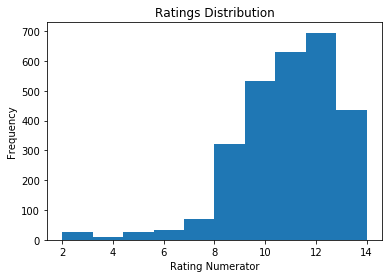

In [75]:
#plot the count of rating numerators between 2 and 14
plt.hist(twitter_master['rating_numerator'], range = (2, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

**Our distribution is left skewed and peaks at 12.**

In [76]:
#count the number of dog stages
twitter_master['dog_stage'].value_counts()

None       2448
pupper      222
doggo        77
puppo        29
floofer      10
Name: dog_stage, dtype: int64

**The most common dog stage is pupper, which is a small dog, ussualy younger, as presented by the @dog_rates account. We also have many dogs that are not classified.**

In [77]:
#filter on dog stages by the median of rating numerator
dogs = twitter_master.groupby(['dog_stage'], as_index = False)['rating_numerator'].median()

dogs

,dog_stage,rating_numerator
0,None,11
1,doggo,12
2,floofer,12
3,pupper,11
4,puppo,12


**The average rating numerator by dog stage is between 11 and 12.**

In [78]:
#highest rated dog
twitter_master['rating_numerator'].value_counts()

12      695
11      631
10      534
13      385
9       182
8       138
7        70
14       52
6        33
5        25
3        22
4         9
2         4
75        2
27        2
1776      2
Name: rating_numerator, dtype: int64

**We have an outlier in the ratings numerators: 1776/10. Let's see more details.**

In [79]:
#check highest rated dog
twitter_master[twitter_master.rating_numerator == 1776]

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1154,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2718,5525
1155,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2716,5523


**The highest rated dog is named Atticus. The number of favorites is 5525 and 5523.**

In [80]:
#check the lowest rating numerator
twitter_master[twitter_master.rating_numerator == 2]

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2098,678424312106393600,2015-12-20,This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1.0,...,0.759945,True,Toy_Poodle,0.101194,True,Shih-Tzu,0.056037,True,2804,5789
2099,678424312106393600,2015-12-20,This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1.0,...,0.759945,True,Toy_Poodle,0.101194,True,Shih-Tzu,0.056037,True,2804,5787
2220,674265582246694913,2015-12-08,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1.0,...,0.998075,False,Ice_Lolly,0.000984,False,Leafhopper,0.000097,False,904,1712
2221,674265582246694913,2015-12-08,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1.0,...,0.998075,False,Ice_Lolly,0.000984,False,Leafhopper,0.000097,False,903,1713


**The smallest rating are given to Crystal and Henry.**

Text(0,0.5,'Count')

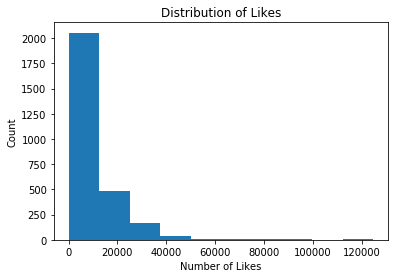

In [87]:
#create histogram for likes
plt.hist(twitter_master['favorite_count']);
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Count')

In [86]:
#median number of likes
twitter_master.favorite_count.median()

5539.5

In [89]:
#view the dog that has the highest number of likes
twitter_master[twitter_master.favorite_count == 124644]

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
172,866450705531457537,2017-05-22,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,...,0.905334,True,Boston_Bull,0.07806,True,Pug,0.001771,True,36644,124644
5544,866450705531457537,2017-05-22,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,...,0.905334,True,Boston_Bull,0.07806,True,Pug,0.001771,True,36644,124644


Text(0,0.5,'Likes')

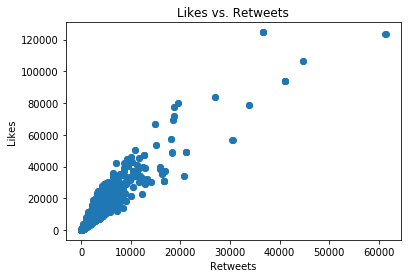

In [88]:
#create scatter plot between retweets and favorites
plt.scatter(twitter_master['retweet_count'], twitter_master['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

**There is a strong positive correlation between retweets and favorites.**